In [1]:
import pandas as pd
from pprint import pprint
from core.clean_data import DataCleaner

In [2]:
cleaner = DataCleaner()

In [3]:
df = cleaner.df

In [4]:
df = cleaner.drop_nulls(df)

Droped 1 all empty rows
Null report:
{'A Solicitação foi': {'prop_nulos': 0.014744682525112119, 'qtd_nulos': 2811},
 'Anexo Resposta': {'prop_nulos': 0.8268352172886779, 'qtd_nulos': 157632},
 'Anexo Solicitação': {'prop_nulos': 0.9290566235673634, 'qtd_nulos': 177120},
 'Anexo do Recurso': {'prop_nulos': 0.9776338220252302, 'qtd_nulos': 186381},
 'Anexo do Recurso.1': {'prop_nulos': 0.9855438117967951, 'qtd_nulos': 187889},
 'Anexo do Recurso.2': {'prop_nulos': 0.9932387421647565, 'qtd_nulos': 189356},
 'Classificação da Resposta': {'prop_nulos': 0.9468803273099216,
                               'qtd_nulos': 180518},
 'Classificação da Resposta.1': {'prop_nulos': 0.9829106454404783,
                                 'qtd_nulos': 187387},
 'Classificação da Resposta.2': {'prop_nulos': 0.9924781662251829,
                                 'qtd_nulos': 189211},
 'Classificação do Motivo de Recurso': {'prop_nulos': 0.9472002937396732,
                                        'qtd_nulos': 18

In [5]:
df['Situação do pedido'].unique()

array(['Encerrada', 'Respondida', 'Em Recurso', 'Recebida', 'Em Análise',
       'Resposta enviada ao cidadão', nan], dtype=object)

In [6]:
encerradas = df['Situação do pedido']=='Encerrada'

df = df[encerradas].copy().reset_index(drop=True)

In [7]:
df['A Solicitação foi'].unique()

array(['Atendida', 'Não Respondido', 'Negada', 'Atendida Parcialmente',
       nan], dtype=object)

In [8]:
atendidas =  df['A Solicitação foi'] == 'Atendida'
df['pedido_atendido'] = atendidas

In [9]:
df['Forma do Pedido'].unique()

array([nan, 'E-mail', 'Carta', 'Pessoalmente', 'Telefone',
       'Formulário Eletrônico', 'Dispositivo Movel'], dtype=object)

In [10]:
df['Forma do Pedido'].isnull().sum()/len(df)

0.00016503407155025554

In [11]:
df['Forma do Pedido'] = df['Forma do Pedido'].apply(lambda x: 'Não informado' if pd.isnull(x) else x)

In [12]:
df.columns

Index(['Data do Pedido', 'Número de Controle', 'Forma do Pedido',
       'Orgão/Entidade', 'SIC', 'Pedido', 'Síntese',
       'Forma de recebimento da resposta', 'Situação do pedido',
       'Natureza da Solicitação', 'A Solicitação foi', 'Resposta',
       'Data da Resposta', 'Prorrogada', 'Redirecionado por',
       'Tempo Resposta (em dias)', 'Anexo Resposta', 'pedido_atendido'],
      dtype='object')

In [13]:
cols_uteis = ['Forma do Pedido', 'Tempo Resposta (em dias)', 'pedido_atendido']

df = df[cols_uteis].copy()

In [14]:
df = pd.get_dummies(df, drop_first = True)

In [15]:
df.head()

,Tempo Resposta (em dias),pedido_atendido,Forma do Pedido_Dispositivo Movel,Forma do Pedido_E-mail,Forma do Pedido_Formulário Eletrônico,Forma do Pedido_Não informado,Forma do Pedido_Pessoalmente,Forma do Pedido_Telefone
0,42.0,True,0,0,0,1,0,0
1,294.0,True,0,0,0,1,0,0
2,61.0,True,0,1,0,0,0,0
3,287.0,True,0,0,0,1,0,0
4,287.0,True,0,0,0,1,0,0


In [16]:
df['Tempo Resposta (em dias)'].isnull().sum()

2189

In [17]:
df = df[df['Tempo Resposta (em dias)'].notnull()].copy().reset_index(drop=True)

In [18]:
df['Tempo Resposta (em dias)'].min()

-1.0

In [19]:
(df['Tempo Resposta (em dias)']<0).sum()

1

In [20]:
tempo_ok = df['Tempo Resposta (em dias)']>0

df = df[tempo_ok]

In [21]:
df['pedido_atendido'].value_counts()

True     117377
False      6980
Name: pedido_atendido, dtype: int64

In [22]:
df['pedido_atendido'].mean()

0.9438712738325948

In [23]:
atendidos = df[df['pedido_atendido']].copy()
n_atendidos = df[~df['pedido_atendido']].copy()

In [24]:
sample_atendidos = atendidos.sample(n=len(n_atendidos), random_state=42)

In [25]:
df = pd.concat([n_atendidos, sample_atendidos])

In [26]:
y = df['pedido_atendido'].copy()
X = df.drop('pedido_atendido', axis=1).copy()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
X_train.head()

,Tempo Resposta (em dias),Forma do Pedido_Dispositivo Movel,Forma do Pedido_E-mail,Forma do Pedido_Formulário Eletrônico,Forma do Pedido_Não informado,Forma do Pedido_Pessoalmente,Forma do Pedido_Telefone
3834,12.0,0,0,1,0,0,0
47777,14.0,0,0,1,0,0,0
77776,12.0,0,0,1,0,0,0
72757,21.0,0,0,1,0,0,0
42616,10.0,0,0,1,0,0,0


In [30]:
import seaborn as sns

In [31]:
plot_df = X_train.copy()
plot_df['Atendido'] = y_train

<AxesSubplot:xlabel='Atendido', ylabel='Tempo Resposta (em dias)'>

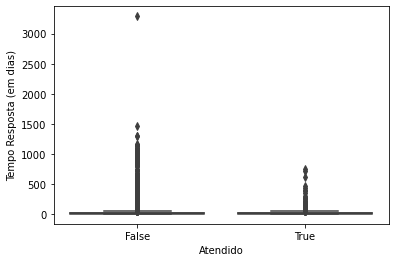

In [32]:
sns.boxplot(x='Atendido', y="Tempo Resposta (em dias)", data=plot_df)

In [33]:
desvio = plot_df['Tempo Resposta (em dias)'].std()
mais_que_3 = plot_df['Tempo Resposta (em dias)'] > (desvio*3)

plot_df = plot_df[~mais_que_3]

<AxesSubplot:xlabel='Atendido', ylabel='Tempo Resposta (em dias)'>

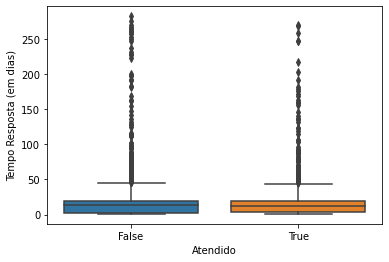

In [34]:
sns.boxplot(x='Atendido', y="Tempo Resposta (em dias)", data=plot_df)

<AxesSubplot:ylabel='Frequency'>

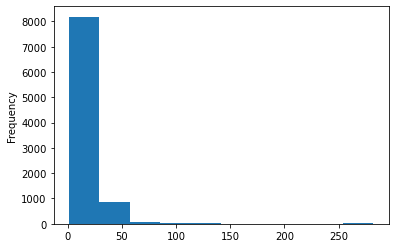

In [35]:
plot_df['Tempo Resposta (em dias)'].plot.hist()

In [36]:
plot_df['Tempo Resposta (em dias)'].min()

1.0

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [39]:
clf.score(X_train, y_train)

0.5257136747567626

In [40]:
clf.score(X_test, y_test)

0.5185587149989147

In [41]:
pprint(dict(zip(X.columns, clf.coef_[0])))

{'Forma do Pedido_Dispositivo Movel': -0.22952773470608645,
 'Forma do Pedido_E-mail': 0.5413455824010921,
 'Forma do Pedido_Formulário Eletrônico': -0.08042713146811166,
 'Forma do Pedido_Não informado': -0.02100752986393851,
 'Forma do Pedido_Pessoalmente': 0.2754026043077862,
 'Forma do Pedido_Telefone': 0.07566049283807699,
 'Tempo Resposta (em dias)': -0.004371923234870486}


In [42]:
from sklearn.metrics import plot_confusion_matrix

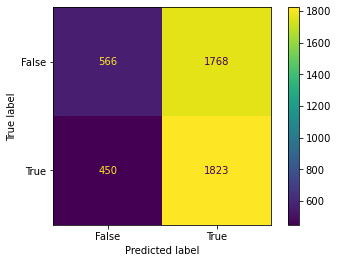

In [43]:
plot_confusion_matrix(clf, X_test, y_test)

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [46]:
clf.score(X_train, y_train)

0.5704052175772479

In [47]:
clf.score(X_test, y_test)

0.5341871065769481

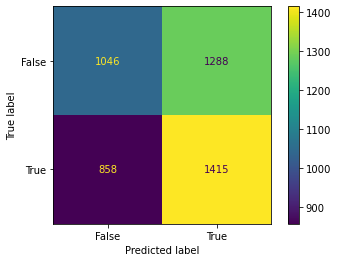

In [48]:
plot_confusion_matrix(clf, X_test, y_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
clf = RandomForestClassifier(max_depth=3, random_state=42).fit(X_train, y_train)

In [51]:
clf.score(X_train, y_train)

0.5444242489040949

In [52]:
clf.score(X_test, y_test)

0.5357065335359236

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [54]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [55]:
clf = clf.fit(X_train, y_train)

In [56]:
clf.score(X_train, y_train)

0.5174810221319363

In [57]:
clf.score(X_test, y_test)

0.5107445192098979

In [58]:
X_train = X_train[['Tempo Resposta (em dias)']]

In [59]:
X_test = X_test[['Tempo Resposta (em dias)']]


In [60]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [61]:
clf = clf.fit(X_train, y_train)

In [62]:
clf.score(X_train, y_train)

0.5188709504971667

In [63]:
clf.score(X_test, y_test)

0.5140004341219883

In [64]:
from sklearn import tree

In [65]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=10).fit(X_train, y_train)

In [66]:
clf.score(X_train, y_train)

0.5465626002352186

In [67]:
clf.score(X_test, y_test)

0.5400477534187107

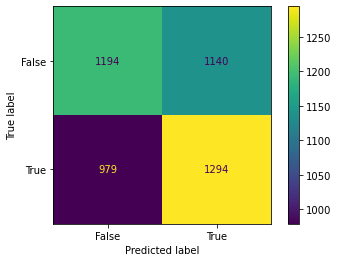

In [68]:
plot_confusion_matrix(clf, X_test, y_test)

In [69]:
import matplotlib.pyplot as plt

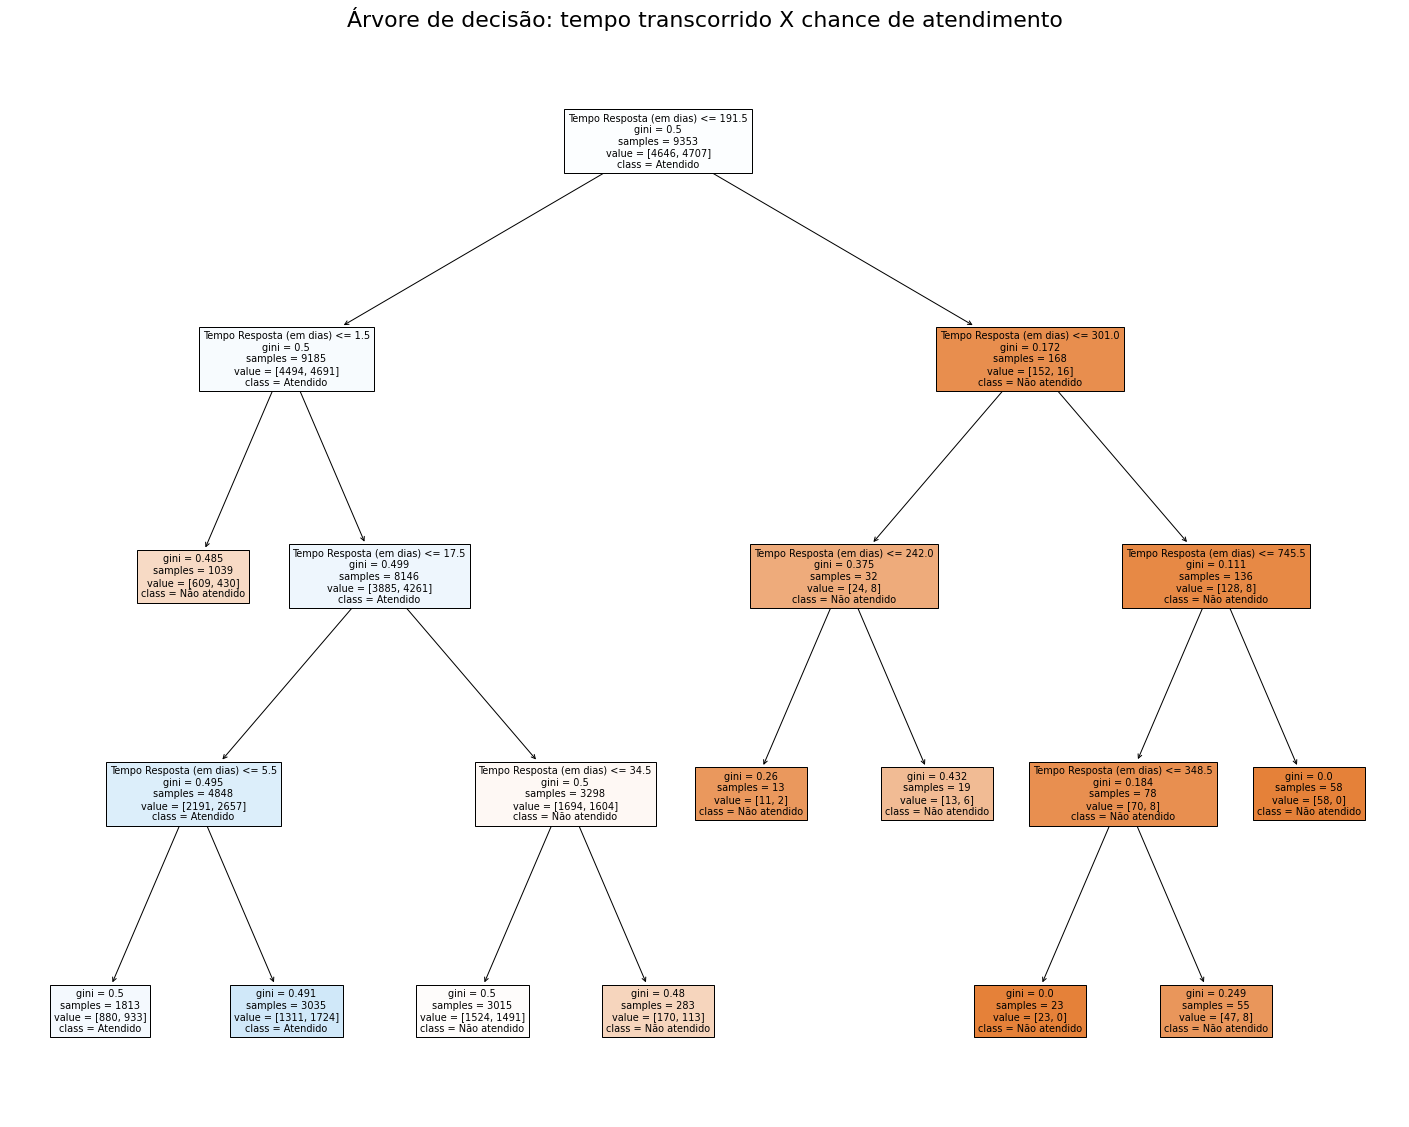

In [70]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,
                   class_names=['Não atendido', 'Atendido'],
                   filled=True)
ax = fig.get_axes()[0]
ax.set_title('Árvore de decisão: tempo transcorrido X chance de atendimento', 
            fontdict = {'fontsize' : 22})

fig.savefig('arvore_decisao_tempo_transcorrido.png')

In [71]:
y_train[(X_train['Tempo Resposta (em dias)']<=1.5)].sum()

430

In [72]:
(y_train[(X_train['Tempo Resposta (em dias)']<=1.5)]==False).sum()

609

<AxesSubplot:xlabel='Tempo Resposta (em dias)', ylabel='Atendido'>

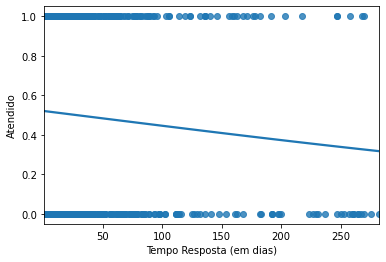

In [73]:
import seaborn as sns

sns.regplot(x='Tempo Resposta (em dias)', y='Atendido', data=plot_df, logistic=True, ci=None)
